# Classification

- Logistic regression
- K-nearest neighbors
- decision tree classification
- gradient boosted machines

In [1]:
# we import the data
import pandas as pd

data_df = pd.read_csv("./data_classification.csv.zip", index_col=["id"])
data_df


,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
id,,,,,,,,,,,,,,,,,,,,,
7,0,2,2,5,1,0,0,1,0,0,...,9,1,5,8,0,1,1,0,0,1
9,0,1,1,7,0,0,0,0,1,0,...,3,1,1,9,0,1,1,0,1,0
13,0,5,4,9,1,0,0,0,1,0,...,4,2,7,7,0,1,1,0,1,0
16,0,0,1,2,0,0,1,0,0,0,...,2,2,4,9,0,0,0,0,0,0
17,0,0,2,0,1,0,1,0,0,0,...,3,1,1,3,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1488013,0,3,1,10,0,0,0,0,0,1,...,4,1,9,6,0,1,1,0,1,1
1488016,0,5,1,3,0,0,0,0,0,1,...,4,1,3,8,1,0,1,0,1,1
1488017,0,1,1,10,0,0,1,0,0,0,...,3,2,2,6,0,0,1,0,0,0


In [2]:
data_df.shape


(595212, 58)

In [3]:
data_df["target"].value_counts(normalize=True)


0    0.963552
1    0.036448
Name: target, dtype: float64

In [4]:
data_df_0 = data_df.loc[data_df["target"] == 0].sample(data_df["target"].sum())
data_df_1 = data_df.loc[data_df["target"] == 1]

data_df_sub = pd.concat([data_df_0, data_df_1]).sample(frac=1.0)
data_df_sub["target"].value_counts(normalize=True)


0    0.5
1    0.5
Name: target, dtype: float64

## Data preparation

In [5]:
data_df_sub.dtypes.value_counts()


int64      48
float64    10
dtype: int64

In [6]:
data_df_sub.isnull().any()


target            False
ps_ind_01         False
ps_ind_02_cat     False
ps_ind_03         False
ps_ind_04_cat     False
ps_ind_05_cat     False
ps_ind_06_bin     False
ps_ind_07_bin     False
ps_ind_08_bin     False
ps_ind_09_bin     False
ps_ind_10_bin     False
ps_ind_11_bin     False
ps_ind_12_bin     False
ps_ind_13_bin     False
ps_ind_14         False
ps_ind_15         False
ps_ind_16_bin     False
ps_ind_17_bin     False
ps_ind_18_bin     False
ps_reg_01         False
ps_reg_02         False
ps_reg_03         False
ps_car_01_cat     False
ps_car_02_cat     False
ps_car_03_cat     False
ps_car_04_cat     False
ps_car_05_cat     False
ps_car_06_cat     False
ps_car_07_cat     False
ps_car_08_cat     False
ps_car_09_cat     False
ps_car_10_cat     False
ps_car_11_cat     False
ps_car_11         False
ps_car_12         False
ps_car_13         False
ps_car_14         False
ps_car_15         False
ps_calc_01        False
ps_calc_02        False
ps_calc_03        False
ps_calc_04      

In [7]:
## We split the data into train and test

from sklearn.model_selection import train_test_split

y = data_df_sub["target"]
X = data_df_sub.drop(columns=["target"])
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.40, random_state=42, stratify=y
)


/tmp/ipykernel_6383/3460639651.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X =  data_df_sub.drop("target", 1)


In [8]:
print(y_test.value_counts(normalize=True))
print(y_train.value_counts(normalize=True))


0    0.5
1    0.5
Name: target, dtype: float64
1    0.5
0    0.5
Name: target, dtype: float64


## Predictive modeling

In [9]:
# We use logistic regression
from sklearn.linear_model import LogisticRegression


In [53]:
# We fit and we predict

clf = LogisticRegression(max_iter=5000, n_jobs=-1, C=1e6)
clf.fit(X_train, y_train)


LogisticRegression(C=1000000.0, max_iter=5000, n_jobs=-1)

In [11]:
prediction = pd.DataFrame({"y": y_test, "prediction": clf.predict(X_test)})
(prediction["y"] == prediction["prediction"]).mean()


0.5901705462088038

In [12]:
from sklearn import metrics

metrics.accuracy_score(prediction["y"], prediction["prediction"])


0.5901705462088038

In [13]:
## True positive rate
metrics.recall_score(prediction["y"], prediction["prediction"])


0.5526619036644388

In [54]:
## Lets try different classifiers

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

lr_clf = LogisticRegression(max_iter=5000, n_jobs=-1)
tree_clf = DecisionTreeClassifier(min_samples_leaf=50)
knn_clf = KNeighborsClassifier(n_neighbors=10, weights="distance", n_jobs=-1)
gbm_clf = GradientBoostingClassifier()


In [58]:
lr_clf.fit(X_train, y_train)
tree_clf.fit(X_train, y_train)
knn_clf.fit(X_train, y_train)
gbm_clf.fit(X_train, y_train)

pred_df = pd.DataFrame(
    {
        "y": y_test,
        "pred_logreg": lr_clf.predict(X_test),
        "pred_knn": knn_clf.predict(X_test),
        "pred_tree": tree_clf.predict(X_test),
        "pred_gbm": gbm_clf.predict(X_test),
    }
)
pred_df


,y,pred_logreg,pred_knn,pred_tree,pred_gbm
id,,,,,
657375,0,1,0,0,0
10816,0,0,0,0,0
820573,1,0,1,1,0
1341057,1,0,1,0,0
806091,0,0,1,0,0
...,...,...,...,...,...
718246,1,1,1,0,1
1005177,1,0,0,0,0
1270868,0,1,1,0,1


In [57]:
(
    pred_df.apply(lambda x: metrics.accuracy_score(pred_df["y"], x)).sort_values(
        ascending=False
    )
).to_frame(name="accuracy")


,accuracy
y,1.000000
pred_gbm,0.597373
pred_logreg,0.590459
pred_tree,0.552259
pred_knn,0.531574


## Receiver operating characteristic curve

In [17]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, lr_clf.predict_proba(X_test)[:, 1])

pd.DataFrame({"fpr": fpr, "tpr": tpr, "thresholds": thresholds})


,fpr,tpr,thresholds
0,0.000000,0.000000,1.922900
1,0.000000,0.000115,0.922900
2,0.000000,0.000230,0.907003
3,0.000115,0.000230,0.906882
4,0.000115,0.000461,0.888207
...,...,...,...
8215,0.999193,0.999770,0.248109
8216,0.999193,0.999885,0.247481
8217,0.999885,0.999885,0.232222
8218,0.999885,1.000000,0.231854


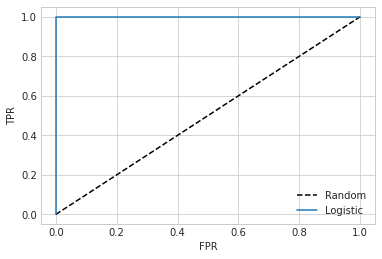

In [61]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")

plt.plot(fpr, fpr, "k--", label="Random")
plt.plot(fpr, tpr, label="Logistic")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend();

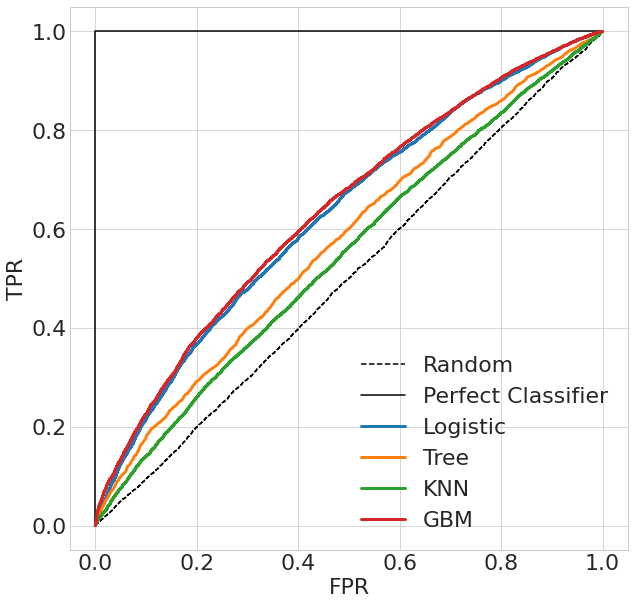

In [62]:
import numpy as np


def plot_ROC(clf, label):
    fpr, tpr, _ = metrics.roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
    plt.plot(fpr, tpr, label=label, lw=3)


plt.figure(figsize=(10, 10))
fpr, tpr, _ = metrics.roc_curve(y_test, np.random.randn(y_test.shape[0]))
plt.plot(fpr, tpr, "k--", label="Random")
fpr, tpr, _ = metrics.roc_curve(
    y_test, y_test + 1e-6 * np.random.randn(y_test.shape[0])
)
plt.plot(fpr, tpr, "k-", label="Perfect Classifier")
plot_ROC(lr_clf, "Logistic")
plot_ROC(tree_clf, "Tree")
plot_ROC(knn_clf, "KNN")
plot_ROC(gbm_clf, "GBM")

plt.xlabel("FPR", fontsize=22)
plt.ylabel("TPR", fontsize=22)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.legend(fontsize=22)


In [20]:
pred_df2 = pd.DataFrame(
    {
        "y": y_test,
        "pred_logreg": lr_clf.predict_proba(X_test)[:, 1],
        "pred_knn": knn_clf.predict_proba(X_test)[:, 1],
        "pred_tree": tree_clf.predict_proba(X_test)[:, 1],
        "pred_gbm": gbm_clf.predict_proba(X_test)[:, 1],
    }
)
pred_df2


,y,pred_LR,pred_KNN,pred_Tree,pred_GBM
id,,,,,
657375,0,0.543239,0.298105,0.336957,0.529646
10816,0,0.291796,0.098966,0.227273,0.305981
820573,1,0.481968,0.703617,0.671642,0.488655
1341057,1,0.428906,0.695837,0.018519,0.419002
806091,0,0.366957,0.708304,0.227273,0.342744
...,...,...,...,...,...
718246,1,0.601228,0.667741,0.381818,0.612962
1005177,1,0.371042,0.496352,0.240741,0.318383
1270868,0,0.508135,0.692341,0.400000,0.567300


In [63]:
(
    pred_df2.apply(lambda x: metrics.roc_auc_score(pred_df2["y"], x)).sort_values(
        ascending=False
    )
).to_frame(name="auc")


,auc
y,1.000000
pred_GBM,0.640563
pred_LR,0.628271
pred_Tree,0.576306
pred_KNN,0.546371


In [22]:
pred_df2.apply(lambda x: x.nunique())


y                2
pred_LR      17356
pred_KNN     17296
pred_Tree      315
pred_GBM     17346
dtype: int64

<AxesSubplot:xlabel='pred_LR_cut'>

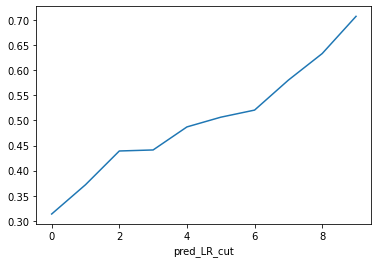

In [23]:
temp = pred_df2.copy()
temp["pred_LR_cut"] = pd.qcut(temp["pred_LR"], 10, labels=False)
temp.groupby("pred_LR_cut")["y"].mean().plot()


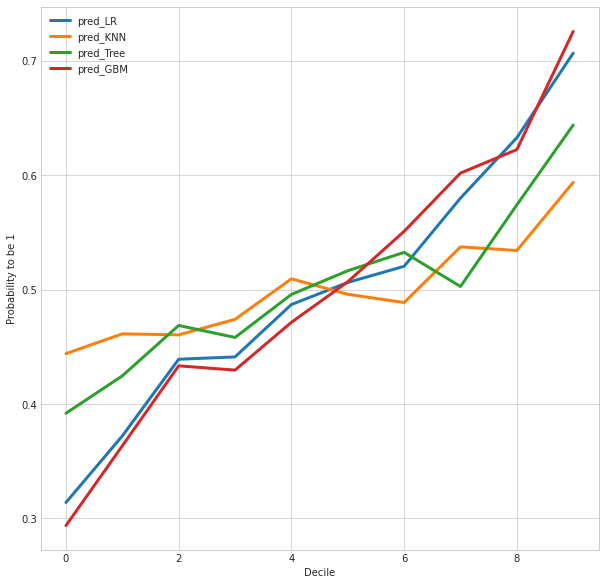

In [65]:
def plot_deciles(col):
    temp = pred_df2.copy()
    temp["Decile"] = pd.qcut(temp[col], 10, labels=False, duplicates="drop")
    temp.groupby("Decile")["y"].mean().plot(label=col, lw=3)


plt.figure(figsize=(10, 10))
pred_df2.drop(columns=["y"]).columns.map(plot_deciles)
plt.ylabel("Probability to be 1")
plt.legend()


## Optimize the model complexity

In [67]:
## let adjust the regulation parameter in Logistic Regression

lr_clf = LogisticRegression(solver="liblinear", max_iter=10000, penalty="l2")

Cs = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

df_auc = pd.DataFrame(index=Cs, columns=["test_auc", "train_auc"])

for c in Cs:
    lr_clf.set_params(C=c)
    lr_clf.fit(X_train, y_train)
    y_estimated_train = lr_clf.predict_proba(X_train)[:, 1]
    y_estimated_test = lr_clf.predict_proba(X_test)[:, 1]
    auc_train = metrics.roc_auc_score(y_train, y_estimated_train)
    auc_test = metrics.roc_auc_score(y_test, y_estimated_test)
    df_auc.loc[c, :] = [auc_test, auc_train]


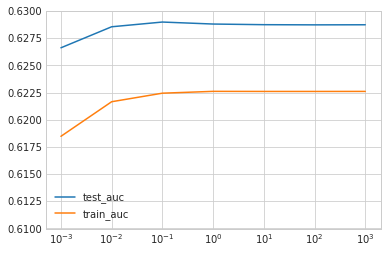

In [71]:
df_auc.plot(logx=True)
plt.ylim(0.61, 0.63)


In [70]:
lr_clf = LogisticRegression(solver="liblinear", penalty="l2")

Cs = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

df_mse = pd.DataFrame(index=Cs, columns=["test_mse", "train_mse"])

for c in Cs:
    lr_clf.set_params(C=c)
    lr_clf.fit(X_train, y_train)
    y_estimated_train = lr_clf.predict(X_train)
    y_estimated_test = lr_clf.predict(X_test)
    mse_train = metrics.mean_squared_error(y_train, y_estimated_train)
    mse_test = metrics.mean_squared_error(y_test, y_estimated_test)
    df_mse.loc[c, :] = [mse_test, mse_train]


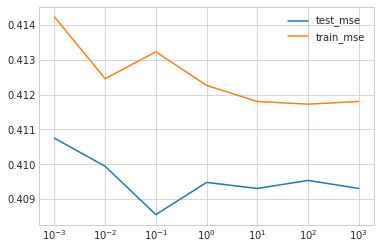

In [72]:
df_mse.plot(logx=True)


## K-fold crossvalidation

In [73]:
from sklearn.linear_model import LogisticRegressionCV

lrcv_clf = LogisticRegressionCV(
    solver="liblinear", scoring="roc_auc", cv=10, Cs=100, n_jobs=-1
)

lrcv_clf.fit(X_train, y_train)


LogisticRegressionCV(Cs=100, cv=10, n_jobs=-1, scoring='roc_auc',
                     solver='liblinear')

In [74]:
df_auccv = pd.DataFrame(lrcv_clf.scores_[1], columns=lrcv_clf.Cs_).transpose()
df_auccv


,0,1,2,3,4,5,6,7,8,9
0.000100,0.602183,0.596017,0.589312,0.599832,0.612550,0.587308,0.610284,0.598835,0.595376,0.601351
0.000120,0.604110,0.598031,0.590941,0.601880,0.614554,0.588808,0.612192,0.599848,0.596967,0.603588
0.000145,0.605949,0.599932,0.592318,0.603633,0.616385,0.590446,0.614086,0.600662,0.598407,0.605722
0.000175,0.607699,0.601694,0.593662,0.605400,0.618310,0.591896,0.616007,0.601436,0.599682,0.607678
0.000210,0.609297,0.603221,0.595030,0.607018,0.620158,0.593022,0.617654,0.602377,0.600957,0.609337
...,...,...,...,...,...,...,...,...,...,...
4750.810162,0.617988,0.616966,0.608822,0.620095,0.629773,0.602999,0.629577,0.609859,0.614825,0.617475
5722.367659,0.618028,0.616966,0.608813,0.620114,0.629787,0.603022,0.629567,0.609869,0.614831,0.617483
6892.612104,0.618016,0.616970,0.608836,0.620103,0.629783,0.602997,0.629557,0.609882,0.614829,0.617490
8302.175681,0.618015,0.616953,0.608847,0.620106,0.629776,0.603007,0.629584,0.609862,0.614802,0.617480


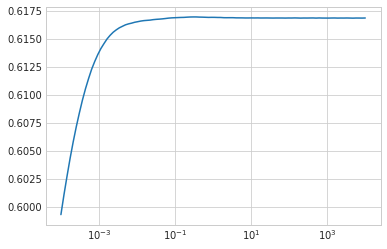

In [75]:
df_auccv.mean(1).plot(logx=True)


In [76]:
lrcv_clf.C_


array([0.29836472])

In [77]:
df_auccv.mean(1).argmax()


43

In [78]:
y_estimated_test = lrcv_clf.predict_proba(X_test)[:, 1]
metrics.roc_auc_score(y_test, y_estimated_test)


0.6289280918531501

## Other functions to tune models

In [79]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

knn_clf = KNeighborsClassifier()


In [80]:
## grid search

param_grid = {
    "n_neighbors": range(1, 6),
    "weights": ["uniform", "distance"],
    "p": [1, 2],
}

grid = GridSearchCV(
    knn_clf, param_grid=param_grid, scoring="roc_auc", n_jobs=-1, cv=3, verbose=1
)

grid.fit(X_train, y_train)


Fitting 3 folds for each of 20 candidates, totalling 60 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 6), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='roc_auc', verbose=1)

In [81]:
grid.best_params_


{'n_neighbors': 5, 'p': 1, 'weights': 'distance'}

In [82]:
grid.best_score_


0.5396426584864474

In [83]:
grid.cv_results_


{'mean_fit_time': array([0.05757205, 0.05896362, 0.04091756, 0.04615005, 0.02277486,
        0.02217126, 0.02376636, 0.01789927, 0.02073002, 0.09331703,
        0.09300645, 0.01745605, 0.02342812, 0.01491364, 0.01698232,
        0.01913699, 0.01881846, 0.01856256, 0.01938105, 0.02275308]),
 'std_fit_time': array([0.00781915, 0.01247558, 0.00650643, 0.01088904, 0.00324775,
        0.00239223, 0.01177929, 0.00253347, 0.00371789, 0.09581347,
        0.0537486 , 0.0011784 , 0.00086946, 0.00088177, 0.0034778 ,
        0.002644  , 0.00345563, 0.0025111 , 0.00492384, 0.0029571 ]),
 'mean_score_time': array([13.00121999, 13.87748369,  1.76999283,  1.74416757, 12.61652048,
        12.46611524,  1.69920619,  1.6860501 , 14.0021553 , 13.37252498,
         1.77812735,  1.71649639, 13.65841715, 12.89571293,  1.71957493,
         1.97783454, 10.2382199 ,  9.85305222,  1.80608122,  1.66048471]),
 'std_score_time': array([0.88683344, 0.87239936, 0.09091788, 0.06378037, 0.74670327,
        0.15856001, 

In [84]:
y_estimated_test = grid.predict_proba(X_test)[:, 1]
metrics.roc_auc_score(y_test, y_estimated_test)


0.5442540033497776

In [85]:
## randomSearch
from sklearn.ensemble import GradientBoostingClassifier
from scipy import stats

param_distributions = {
    "learning_rate": stats.uniform(0.0001, 0.5),
    "n_estimators": stats.randint(100, 500),
    "max_depth": stats.randint(2, 20),
    "min_samples_split": stats.uniform(0, 1),
    "min_samples_leaf": stats.uniform(0, 0.5),
    "min_weight_fraction_leaf": stats.uniform(0, 0.5),
    "subsample": stats.uniform(0.2, 0.8),
    "max_leaf_nodes": stats.randint(4, 1000),
}

gbm_clf = GradientBoostingClassifier()

r_grid = RandomizedSearchCV(
    gbm_clf,
    param_distributions=param_distributions,
    cv=3,
    n_jobs=-1,
    n_iter=10,
    verbose=1,
)

r_grid.fit(X_train, y_train)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_jobs=-1,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fe928fbb2e0>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fe928f7ac80>,
                                        'max_leaf_nodes': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fe928f3bfd0>,
                                        'min_sa...
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fe928fd6b00>,
                                        'min_weight_fraction_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fe928fd5210>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fe928fd6f80>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fe928f38fd0>},
                   verbose=1)

In [86]:
r_grid.best_params_


{'learning_rate': 0.4131332119048919,
 'max_depth': 8,
 'max_leaf_nodes': 613,
 'min_samples_leaf': 0.06382233601989312,
 'min_samples_split': 0.2988106714921095,
 'min_weight_fraction_leaf': 0.302009371636342,
 'n_estimators': 400,
 'subsample': 0.4591032839705716}

In [87]:
r_grid.best_score_


0.5685696036943702

In [88]:
y_estimated_test = r_grid.predict_proba(X_test)[:, 1]


In [89]:
from sklearn import metrics

metrics.roc_auc_score(y_test, y_estimated_test)


0.6129521391203586

## Variable importance

In [90]:
gbm_clf.fit(X_train, y_train)


GradientBoostingClassifier()

<AxesSubplot:>

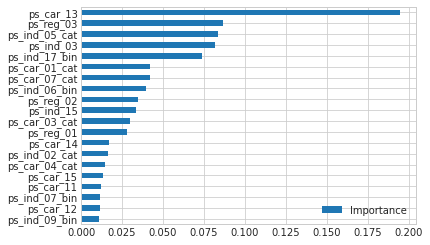

In [91]:
%matplotlib inline

var_imp = pd.DataFrame({"Importance": gbm_clf.feature_importances_}, index=X_train.columns)
var_imp.sort_values("Importance").iloc[-20:].plot(kind="barh")

In [92]:
var_imp.sort_values("Importance").iloc[-20:]


,Importance
ps_ind_09_bin,0.010934
ps_car_12,0.011330
ps_ind_07_bin,0.011677
ps_car_11,0.012385
ps_car_15,0.013212
ps_car_04_cat,0.014888
ps_ind_02_cat,0.016616
ps_car_14,0.017312
ps_reg_01,0.028068
ps_car_03_cat,0.030008


In [93]:
(data_df_sub.groupby("target")["ps_car_13"].mean()).to_frame()


,ps_car_13
target,
0,0.812446
1,0.875505


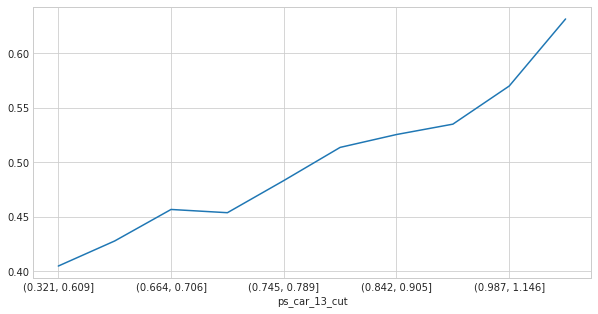

In [95]:
data_df_sub["ps_car_13_cut"] = pd.qcut(data_df_sub["ps_car_13"], 10)
data_df_sub.groupby("ps_car_13_cut")["target"].mean().plot(figsize=(10, 5))
